# Imports

In [1]:
import pandas as pd
import numpy as np
import pickle
import math
import datetime as dt
import json
import requests
from tqdm import tqdm

In [2]:
import geopandas as gpd
import geojson
import h3
import osm2geojson
import shapely
from shapely import wkt
from shapely.geometry import Point, Polygon, LineString
from geopy.distance import geodesic, great_circle

In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [4]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [5]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

# Login to DWH

In [3]:
from tochka.datalab.datasources import connect_to_dwh

In [4]:
dwh_login = 'BOCHKAREV_DV'

In [5]:
dwh_pass = 'r5eN3Y6z'

In [6]:
dwh_connection = connect_to_dwh(dwh_login, dwh_pass)

# Region

In [31]:
# reg = 66 # Екатеринбург
# reg = 52 # Нижний Новгород
# reg = 72 # Тюмень
# reg = 45 # Курган
# reg = 50 # Московская
# reg = 23 # Краснодар
reg = 61 # Ростов

# EGRUL

In [8]:
pd.read_sql_query(f"""
    SELECT *
    FROM DATAMART.EGRUL
    FETCH FIRST 20 ROWS ONLY
    """,
    dwh_connection).T

/usr/lib64/python3.6/site-packages/sqlalchemy/dialects/oracle/base.py:1316: SAWarning: Oracle version (19, 0, 0, 0, 0) is known to have a maximum identifier length of 128, rather than the historical default of 30. SQLAlchemy 1.4 will use 128 for this database; please set max_identifier_length=128 in create_engine() in order to test the application with this new length, or set to 30 in order to assure that 30 continues to be used.  In particular, pay close attention to the behavior of database migrations as dynamically generated names may change. See the section 'Max Identifier Lengths' in the SQLAlchemy Oracle dialect documentation for background.
  % ((self.server_version_info,))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
legal_entity_id,383033300,383031377,383031378,383033353,383012205,383031360,383031361,383031363,383012194,383012195,383031020,383033301,383033302,383033306,383033307,383033308,383030993,383030948,383033309,383033314
updated,2022-06-04 03:14:43,2022-06-04 03:14:43,2022-06-08 03:16:39,2022-06-08 03:15:57,2022-09-18 05:43:15,2022-06-04 03:14:20,2022-06-04 03:14:39,2022-06-04 03:14:43,2022-09-23 05:45:09,2022-06-09 03:17:24,2022-06-04 03:14:44,2022-06-04 03:14:41,2022-07-21 03:16:49,2022-06-04 03:14:43,2022-06-04 03:14:41,2022-06-04 03:14:41,2022-06-04 03:14:44,2022-06-04 03:14:43,2022-06-04 03:14:41,2022-06-04 03:14:42
kind,2,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2
title,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ МИСАЙЛОВ АЛЕКСА...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ НАСИБОВ ФИКРЕТ ...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ЯШИНА АННА ЮРЬЕВНА,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ИГОШИН АНТОН СТ...,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРКОМ""",ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ НОСОВА НАТАЛЬЯ ...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ РУБЦОВ ИЛЬЯ ИВА...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ МОИСЕЕВА ГАЛИНА...,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МИТА""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ДРЫГИНА ОЛЬГА А...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ КУЛЕШОВА АЛЕСЯ ...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ АБАЕВ АНТОН МАР...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ФРОЛОВ АЛЕКСАНД...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ЧЕРНЫХ ПАВЕЛ СЕ...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ МИНГАЛОВА ЮЛИЯ ...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ АНИЩЕНКО АЛЕКСА...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ РОДАК АЛЕКСЕЙ В...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ШИТИН АЛЕКСЕЙ Г...,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ЛУЗИН ПЕТР АЛЕК...
title_short,ИП МИСАЙЛОВ,ИП НАСИБОВ,ИП ЯШИНА,ИП ИГОШИН,"ООО ""АРКОМ""",ИП НОСОВА,ИП РУБЦОВ,ИП МОИСЕЕВА,"ООО ""МИТА""","ООО ""СТРОЙСНАБ""",ИП ДРЫГИНА,ИП КУЛЕШОВА,ИП АБАЕВ,ИП ФРОЛОВ,ИП ЧЕРНЫХ,ИП МИНГАЛОВА,ИП АНИЩЕНКО,ИП РОДАК,ИП ШИТИН,ИП ЛУЗИН
email,MISAY020781@YANDEX.RU,None,NUHASIK@GMAIL.COM,WRESTLER5256@MAIL.RU,INNOVATIONSERVICE@MAIL.RU,NATALIA_N_NOSOVA@MAIL.RU,ILYA.RUBCZOFF@YANDEX.RU,79030165973@YANDEX.RU,MITAOOO@MAIL.RU,None,TEATRKRISTINA@YANDEX.RU,VECTOR.N@INBOX.RU,AIRIS16@MAIL.RU,None,PAVEL123312@YANDEX.RU,MINGALOVA87G@MAIL.RU,AAN81@MAIL.RU,A_RODAK@MAIL.RU,ALEKSEISITIN8@GMAIL.COM,PETR_WORK38@MAIL.RU
ogrn,322385000050448,322784700165938,322784700165949,322565800040120,1225500013001,322774600342308,322774600342342,322774600342361,1225000055719,1225000055763,322619600104371,322385000050459,322385000050460,322385000050501,322385000050512,322385000050523,322619600104025,322547600080290,322385000050534,322385000050589
inn,032615218460,781304421901,781426066394,563605364177,5503260156,543651631307,361703571359,622401469508,5007115962,5027306482,616512459633,382004063082,380502409325,850602008547,753002833928,381453093325,615424365021,540432373496,380582898735,380125900694
kpp,None,None,None,None,550301001,None,None,None,500701001,502701001,None,None,None,None,None,None,None,None,None,None
company_type_title_raw,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Общества с ограниченной ответственностью,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Общества с ограниченной ответственностью,Общества с ограниченной ответственностью,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель,Индивидуальный предприниматель


In [9]:
pd.read_sql_query("""
    SELECT *
    FROM CORE.ESB_ERUZ_CONTRACTOR --STAGE.ERUZ_MAIN
    FETCH FIRST 20 ROWS ONLY
    """,
    dwh_connection).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,4ec243b1-9b5a-490a-a672-39a0420e64dd,bf16d7e8-bd42-4468-8245-0492da298847,4538a595-dbc6-49aa-9802-aed173379a49,498f2254-c851-471a-9629-9e654ebc4401,0e47a83d-f0f9-4fc7-b0ad-7e24440d4143,67614fbd-60b9-4fd2-b538-9d15dcf1577b,bbed023c-915a-4dbd-87be-6dc3c45f324c,618017e0-1fbc-4171-8c83-430efd2b1cad,1f7e3c08-960f-4081-a4cb-a0ce550ceaff,efc26aac-9496-40d0-8197-c84fac0cc42e,a15e7bd3-99cc-4fbc-89e7-3380848a4303,ae0eab66-4743-428b-8909-273dfd664e3f,87673be6-419c-42ff-a04e-217166816164,8c651185-6677-4203-995f-f69160dea366,500d3b73-33c6-4db0-85d7-fc542a14276f,c43ffc8e-1842-4d74-ad8a-5a63a22a564d,336e109c-2b76-4e63-bdb7-f4cb881e6c09,901ab8b7-a7b4-40ce-bfbd-ddfa23dbde93,32623ff0-4a51-4a96-b5ba-726db449fb55,55be5eef-0e90-4a50-a64a-f0b7f69d294f
tms,2022-10-05 08:39:02.321000,2022-10-05 08:39:02.370000,2022-10-05 08:39:02.588000,2022-10-05 08:39:03.232000,2022-10-05 08:39:03.157000,2022-10-05 08:39:03.322000,2022-10-05 08:39:02.653000,2022-10-05 08:39:03.381000,2022-10-05 08:39:03.443000,2022-10-05 08:39:03.194000,2022-10-05 08:39:03.215000,2022-10-05 08:39:03.143000,2022-10-05 08:39:03.250000,2022-10-05 08:39:03.654000,2022-10-05 08:39:03.590000,2022-10-05 08:39:03.557000,2022-10-05 08:39:03.664000,2022-10-05 08:39:03.264000,2022-10-05 08:39:03.337000,2022-10-05 08:39:03.645000
dt,2022-10-05 10:39:02,2022-10-05 10:39:02,2022-10-05 10:39:02,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:02,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03,2022-10-05 10:39:03
kind,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_LEGAL_ENTITY_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_INDIVIDUAL_PERSON_RF,CONTRACTOR_LEGAL_ENTITY_RF
document_id,4907422,4897649,4898372,4900503,4902146,4897266,4911245,4898536,4891152,4902101,4900616,4899193,4900853,4889122,4890440,4897267,4889065,4900744,4900337,4889880
registry_num,19329661,20009543,22059911,22043114,20112008,22054932,21085273,19314197,19191877,20112008,22062110,22061771,22062035,22044225,19103068,22014458,19289137,22062132,22062016,20043688
is_exclude,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
inn,150901225100,150101562508,561213007244,665893713526,6686124086,260805928821,2626050474,6658444711,6732059733,6686124086,660202010711,2634805129,6685188337,262810470121,2634049360,667210661660,263408773140,661506034949,667010504646,2635244162
kpp,None,None,None,None,668601001,None,263201001,665801001,671401001,668601001,None,263401001,668501001,None,263401001,None,None,None,None,263501001
foreign_inn,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [13]:
pd.read_sql_query("""
    SELECT inn, count(1)
    FROM CORE.ESB_ERUZ_CONTRACTOR --STAGE.ERUZ_MAIN
    group by inn
    having count(1) > 1
    FETCH FIRST 20 ROWS ONLY
    """,
    dwh_connection)

,inn,COUNT(1)
0,6658444711,8
1,262810470121,6
2,2636807210,5
3,2634092171,7
4,262301259607,3
5,7817063635,6
6,782540190688,5
7,662336896894,6
8,263600740976,11
9,740413390808,5


In [29]:
%%time
df_inn = pd.read_sql_query(f"""
    SELECT
          E.inn
        , E.tax_agency_code
        , E.begin_date
        , E.end_date
        , E.end_code
        , E.full_address
        , E.kladr_code
        , E.main_okved
        
        , ERUZ.inn inn_eruz
        , ERUZ.start_reg_date
        , ERUZ.end_reg_date
        
        ,D.year
        ,CASE WHEN D.id IS NULL THEN -1 ELSE D.correction_num END correction_num
        
        ,COALESCE(
            B.assets_balance_fiscal_period,
            BS.assets_balance_fiscal_period,
            0
            )
            *
            CASE
                WHEN D.okei = 383 THEN 1
                WHEN D.okei = 384 THEN 1e3
                WHEN D.okei = 385 THEN 1e6
                ELSE 1
            END
            assets_balance
            
        ,COALESCE(
            B.short_borrowed_funds_fiscal_period,
            BS.short_borrowed_funds_fiscal_period,
            0
            )
            *
            CASE
                WHEN D.okei = 383 THEN 1
                WHEN D.okei = 384 THEN 1e3
                WHEN D.okei = 385 THEN 1e6
                ELSE 1
            END
            short_borrowed_funds
            
        ,COALESCE(
            B.long_borrowed_funds_fiscal_period,
            BS.long_borrowed_funds_fiscal_period,
            0
            )
            *
            CASE
                WHEN D.okei = 383 THEN 1
                WHEN D.okei = 384 THEN 1e3
                WHEN D.okei = 385 THEN 1e6
                ELSE 1
            END
            long_borrowed_funds
        
        ,COALESCE(
            FR.revenue_fiscal_year,
            FRS.revenue_fiscal_year,
            0
            )
            *
            CASE
                WHEN D.okei = 383 THEN 1
                WHEN D.okei = 384 THEN 1e3
                WHEN D.okei = 385 THEN 1e6
                ELSE 1
            END
            revenue
            
        ,COALESCE(
            FR.net_profit_loss_fiscal_year,
            FRS.net_profit_loss_fiscal_year,
            0
            )
            *
            CASE
                WHEN D.okei = 383 THEN 1
                WHEN D.okei = 384 THEN 1e3
                WHEN D.okei = 385 THEN 1e6
                ELSE 1
            END
            net_profit_loss
        
    FROM
        DATAMART.EGRUL E
        
        LEFT JOIN (
            SELECT
                  inn
                , MAX(start_reg_date) start_reg_date
                , MAX(end_reg_date) end_reg_date
            FROM CORE.ESB_ERUZ_CONTRACTOR
            GROUP BY inn
            ) ERUZ
            ON E.inn = ERUZ.inn
            
        LEFT JOIN STAGE.GIRBO_TAX_PAYER TP
            ON E.inn = TP.org_inn
        LEFT JOIN STAGE.GIRBO_DOCUMENT D
            ON TP.id = D.id AND D.year = 2020 AND D.period = 34
        LEFT JOIN STAGE.GIRBO_BALANCE B
            ON TP.id = B.id
        LEFT JOIN STAGE.GIRBO_FINANCIAL_RESULT FR
            ON TP.id = FR.id
        LEFT JOIN STAGE.GIRBO_BALANCE_SIMPLE BS
            ON TP.id = BS.id
        LEFT JOIN STAGE.GIRBO_FINANCIAL_RESULT_SIMPLE FRS
            ON TP.id = FRS.id  
        
    WHERE
        1 = 1
        AND E.kind = 1
        AND SUBSTR(E.inn, 0, 2) = '{reg}'
        AND SUBSTR(E.tax_agency_code, 0, 2) = '{reg}'
        AND EXTRACT(YEAR FROM E.begin_date) <= 2021
        AND NVL(EXTRACT(YEAR FROM E.end_date),2099) >= 2020
    """,
    dwh_connection)

CPU times: user 6.2 s, sys: 2.75 s, total: 8.95 s
Wall time: 3min 51s


In [30]:
df_inn.shape

(306147, 18)

In [31]:
df_inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306147 entries, 0 to 306146
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   inn                   306147 non-null  object        
 1   tax_agency_code       306147 non-null  object        
 2   begin_date            306147 non-null  datetime64[ns]
 3   end_date              40153 non-null   datetime64[ns]
 4   end_code              40153 non-null   object        
 5   full_address          306147 non-null  object        
 6   kladr_code            270340 non-null  object        
 7   main_okved            303711 non-null  object        
 8   inn_eruz              47317 non-null   object        
 9   start_reg_date        47234 non-null   object        
 10  end_reg_date          32742 non-null   object        
 11  year                  89090 non-null   float64       
 12  correction_num        306147 non-null  int64         
 13 

In [32]:
df_inn = df_inn.sort_values(
    by='correction_num',
    axis=0,
    ascending=True
).drop_duplicates(
    subset='inn',
    keep='last',
    ignore_index=True)

In [33]:
df_inn.shape

(139885, 18)

In [34]:
df_inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139885 entries, 0 to 139884
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   inn                   139885 non-null  object        
 1   tax_agency_code       139885 non-null  object        
 2   begin_date            139885 non-null  datetime64[ns]
 3   end_date              33281 non-null   datetime64[ns]
 4   end_code              33281 non-null   object        
 5   full_address          139885 non-null  object        
 6   kladr_code            122742 non-null  object        
 7   main_okved            137999 non-null  object        
 8   inn_eruz              16292 non-null   object        
 9   start_reg_date        16219 non-null   object        
 10  end_reg_date          11237 non-null   object        
 11  year                  83693 non-null   float64       
 12  correction_num        139885 non-null  int64         
 13 

In [35]:
df_inn.head()

,inn,tax_agency_code,begin_date,end_date,end_code,full_address,kladr_code,main_okved,inn_eruz,start_reg_date,end_reg_date,year,correction_num,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss
0,6686126100,6686,2020-06-17,2021-11-26,407,"620042, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010000111,41.20,None,None,None,NaN,-1,0,0,0,0,0
1,6671288941,6671,2009-06-05,2020-09-25,407,"620146, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001255,45.20.1,None,None,None,NaN,-1,0,0,0,0,0
2,6658518787,6658,2018-07-23,2020-10-02,407,"620109, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010000368,69.10,None,None,None,NaN,-1,0,0,0,0,0
3,6670469092,6670,2018-06-13,2021-03-12,407,"620137, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001077,74.10,None,None,None,NaN,-1,0,0,0,0,0
4,6672199934,6685,2005-12-01,2020-06-03,407,"620138, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001221,68.32.1,None,None,None,NaN,-1,0,0,0,0,0


In [36]:
df_inn.groupby(df_inn.inn.map(len)).size()

inn
10    139885
dtype: int64

In [48]:
df_inn['count_2020'] = 0
df_inn.loc[
    (df_inn.begin_date.dt.year <= 2020) &
    ((df_inn.end_date.isnull()) | (df_inn.end_date.dt.year >= 2020)),
    'count_2020'
] = 1

In [49]:
df_inn.groupby('count_2020').size()

count_2020
0      7733
1    132152
dtype: int64

In [50]:
df_inn['count_2021'] = 0
df_inn.loc[
    (df_inn.begin_date.dt.year <= 2021) &
    ((df_inn.end_date.isnull()) | (df_inn.end_date.dt.year >= 2021)),
    'count_2021'
] = 1

In [51]:
df_inn.groupby('count_2021').size()

count_2021
0     15680
1    124205
dtype: int64

In [52]:
df_inn['begin_2021'] = 0
df_inn.loc[
    (df_inn.begin_date.dt.year == 2021),
    'begin_2021'
] = 1

In [53]:
df_inn.groupby('begin_2021').size()

begin_2021
0    132152
1      7733
dtype: int64

In [58]:
df_inn[df_inn.kladr_code.notnull()].groupby('begin_2021').size()

begin_2021
0    121207
1      1535
dtype: int64

In [54]:
df_inn['end_2021'] = 0
df_inn.loc[
    (df_inn.end_date.dt.year == 2021),
    'end_2021'
] = 1

In [55]:
df_inn.groupby('end_2021').size()

end_2021
0    129165
1     10720
dtype: int64

In [56]:
df_inn.groupby(df_inn.kladr_code.apply(lambda x: len(str(x)))).size()

kladr_code
4      17143
11      1510
15    121232
dtype: int64

In [57]:
df_inn.groupby([df_inn.inn.map(len), df_inn.full_address.notnull(), df_inn.kladr_code.notnull()]).size()

inn  full_address  kladr_code
10   True          False          17143
                   True          122742
dtype: int64

## Update FIAS from Karma

In [62]:
api_url = 'https://karma-egrul-http.query.consul-test/api/v1/jsonrpc'

In [63]:
def f_get_data(inn):
    return {
        'jsonrpc':'2.0',
        'method':'get_company',
        'params':{'inn':inn},
        'id':1
    }

In [80]:
df_inn_upd = pd.DataFrame(columns=[
    'inn',
    'kladr_code',
    'fias_code'
])

In [76]:
def f_parse_egrul(egrul_json):
    
    res = egrul_json['result']['jsondata']
    result = {}
        
    # ЮЛ    
    if 'СвЮЛ' in res:
        result['inn'] = res['СвЮЛ']['ИНН'] if 'ИНН' in res['СвЮЛ'] else None

        # адрес
        if 'СвАдресЮЛ' in res['СвЮЛ']:
            if 'АдресРФ' in res['СвЮЛ']['СвАдресЮЛ']:
                result['kladr_code'] = res['СвЮЛ']['СвАдресЮЛ']['АдресРФ']['КодАдрКладр'] if 'КодАдрКладр' in res['СвЮЛ']['СвАдресЮЛ']['АдресРФ'] else None

            if 'СвАдрЮЛФИАС' in res['СвЮЛ']['СвАдресЮЛ']:
                result['fias_code'] = res['СвЮЛ']['СвАдресЮЛ']['СвАдрЮЛФИАС']['ИдНом'] if 'ИдНом' in res['СвЮЛ']['СвАдресЮЛ']['СвАдрЮЛФИАС'] else None

    return result

In [77]:
import warnings
warnings.simplefilter('ignore')

In [78]:
for inn in df_inn.loc[df_inn.kladr_code.isnull(), 'inn'][:15]:
    try:
        response = requests.post(
            api_url,
            json=f_get_data(inn),
            headers={'content-type':'application/json'},
            verify=False
        )
        egrul_json = response.json()
        df_inn_upd = pd.concat(
            [
                df_inn_upd,
                pd.DataFrame(f_parse_egrul(egrul_json), index=[0])],
            ignore_index=True
        ) 
        print('ok')
    except Exception:
        print('err')

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [79]:
df_inn_upd

,inn,kladr_code,fias_code
0,6612056385,NaN,b38759ef-097b-48c8-8f46-2af1f59672be
1,6670504727,NaN,605ac09b-1ae1-4187-8ab8-634d53781bfd
2,6623138174,NaN,079f6783-3bde-4a34-8c15-7995c7b1eb39
3,6670504519,NaN,77b6bafc-d250-469b-b366-302eb3deb057
4,6685195398,NaN,ad7205e3-ea8e-423d-b6b8-472780d5b561
5,6685193908,NaN,817f7ebd-e6c5-4a5a-9ecf-1fc5e50e28f8
6,6658542613,NaN,4f942a19-873a-4813-8abc-11afab77b47b
7,6658548284,NaN,d2274042-7369-4431-914b-5bc6bbb87ac0
8,6686136412,NaN,2627defd-91d3-4ac3-978d-c699a3d1488a
9,6670500610,NaN,53b27c20-63b5-4fe3-b417-706cfa42e2ba


In [81]:
for inn in tqdm(df_inn.loc[df_inn.kladr_code.isnull(), 'inn']):
    try:
        response = requests.post(
            api_url,
            json=f_get_data(inn),
            headers={'content-type':'application/json'},
            verify=False
        )
        egrul_json = response.json()
        df_inn_upd = pd.concat(
            [
                df_inn_upd,
                pd.DataFrame(f_parse_egrul(egrul_json), index=[0])],
            ignore_index=True
        ) 
        # print('ok')
    except Exception:
        # print('err')
        pass

100%|██████████| 17143/17143 [30:19<00:00,  9.42it/s]  


In [82]:
df_inn_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17143 entries, 0 to 17142
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   inn         17143 non-null  object
 1   kladr_code  0 non-null      object
 2   fias_code   17117 non-null  object
dtypes: object(3)
memory usage: 401.9+ KB


In [83]:
df_inn.shape

(139885, 23)

In [84]:
df_inn = df_inn.merge(
    df_inn_upd[['inn', 'fias_code']],
    how = 'left',
    on = 'inn'
)

In [85]:
df_inn.shape

(139885, 24)

In [87]:
df_inn.groupby(
    [
        df_inn.inn.map(len),
        df_inn.full_address.notnull(),
        df_inn.kladr_code.notnull(),
        df_inn.fias_code.notnull()
    ]
).size()

inn  full_address  kladr_code  fias_code
10   True          False       False            26
                               True          17117
                   True        False        122742
dtype: int64

In [88]:
df_inn.to_csv(f'/home/tochka/Documents/Other/Work/Geo/EGRUL/inn/df_inn_{str(reg)}_2.csv.gz', index=False, sep=';', compression='gzip')

In [32]:
df_inn = pd.read_csv(
    f'/home/tochka/Documents/Other/Work/Geo/EGRUL/inn/df_inn_{str(reg)}_2.csv.gz',
    parse_dates=['begin_date','end_date','start_reg_date','end_reg_date'],
    dtype={
        'inn':str,
        'tax_agency_code':str,
        'end_code':str,
        'kladr_code':str,
        'kladr_11':str,
        'inn_eruz':str
    },
    sep=';',
    compression='gzip'
)

In [33]:
df_inn.head()

,inn,tax_agency_code,begin_date,end_date,end_code,full_address,kladr_code,main_okved,inn_eruz,start_reg_date,end_reg_date,year,correction_num,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,count_2020,count_2021,begin_2021,end_2021,fias_code
0,6165147278,6195,2008-03-31,2022-04-13,415,"344000, ОБЛАСТЬ РОСТОВСКАЯ, Г. РОСТОВ-НА-ДОНУ,...",610000010001626,46.69.3,6165147278,2019-11-27,2022-11-27,NaN,-1,390134,65,560,0,0,1,1,0,0,NaN
1,6143097400,6174,2019-01-29,2021-03-25,407,"347360, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД ВОЛГОДОНСК, ...",610000040000049,66.22,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,1,0,1,NaN
2,6167198422,6195,2020-03-24,2021-07-01,415,"344019, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДО...",610000010001762,46.73,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,1,0,1,NaN
3,6166097090,6193,2015-11-16,2020-06-10,415,"344009, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДО...",610000010001762,46.90,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,0,0,0,NaN
4,6101007451,6188,2002-12-15,NaT,NaN,"346762, ОБЛАСТЬ РОСТОВСКАЯ, Р-Н АЗОВСКИЙ, Х ПО...",610020000880005,01.11.1,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,1,0,0,NaN


In [34]:
df_inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84808 entries, 0 to 84807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   inn                   84808 non-null  object        
 1   tax_agency_code       84808 non-null  object        
 2   begin_date            84808 non-null  datetime64[ns]
 3   end_date              23631 non-null  datetime64[ns]
 4   end_code              23631 non-null  object        
 5   full_address          84808 non-null  object        
 6   kladr_code            75276 non-null  object        
 7   main_okved            83752 non-null  object        
 8   inn_eruz              8779 non-null   object        
 9   start_reg_date        8740 non-null   datetime64[ns]
 10  end_reg_date          6302 non-null   datetime64[ns]
 11  year                  48282 non-null  float64       
 12  correction_num        84808 non-null  int64         
 13  assets_balance  

# KLADR_Code

In [35]:
len(df_inn.loc[
    df_inn.kladr_code.notnull()
])

75276

In [36]:
df_inn.loc[
    df_inn.kladr_code.notnull(),
    'kladr_code'
].nunique()

8487

In [37]:
df_inn.loc[
    df_inn.kladr_code.notnull()
].groupby(df_inn.kladr_code.apply(lambda x: len(str(x)))).size()

kladr_code
11      812
15    74464
dtype: int64

In [38]:
df_inn['kladr_11'] = df_inn['kladr_code'].str[:11]

In [39]:
df_inn.loc[
    df_inn.kladr_code.notnull()
].head()

,inn,tax_agency_code,begin_date,end_date,end_code,full_address,kladr_code,main_okved,inn_eruz,start_reg_date,end_reg_date,year,correction_num,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,count_2020,count_2021,begin_2021,end_2021,fias_code,kladr_11
0,6165147278,6195,2008-03-31,2022-04-13,415,"344000, ОБЛАСТЬ РОСТОВСКАЯ, Г. РОСТОВ-НА-ДОНУ,...",610000010001626,46.69.3,6165147278,2019-11-27,2022-11-27,NaN,-1,390134,65,560,0,0,1,1,0,0,NaN,61000001000
1,6143097400,6174,2019-01-29,2021-03-25,407,"347360, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД ВОЛГОДОНСК, ...",610000040000049,66.22,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,1,0,1,NaN,61000004000
2,6167198422,6195,2020-03-24,2021-07-01,415,"344019, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДО...",610000010001762,46.73,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,1,0,1,NaN,61000001000
3,6166097090,6193,2015-11-16,2020-06-10,415,"344009, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДО...",610000010001762,46.90,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,0,0,0,NaN,61000001000
4,6101007451,6188,2002-12-15,NaT,NaN,"346762, ОБЛАСТЬ РОСТОВСКАЯ, Р-Н АЗОВСКИЙ, Х ПО...",610020000880005,01.11.1,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,1,1,0,0,NaN,61002000088


In [40]:
for i in df_inn.loc[
    df_inn.kladr_code.notnull(),
    'full_address'
][:15]:
    print(i)

344000, ОБЛАСТЬ РОСТОВСКАЯ, Г. РОСТОВ-НА-ДОНУ, УЛ. ТУРКЕСТАНСКАЯ, Д. 1-А ОФИС 208
347360, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД ВОЛГОДОНСК, УЛИЦА ЛЕНИНА, ДОМ 6
344019, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДОНУ, ПРОСПЕКТ ШОЛОХОВА, ДОМ 17 ОФИС 7
344009, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДОНУ, ПРОСПЕКТ ШОЛОХОВА, ДОМ 264 ОФИС 31
346762, ОБЛАСТЬ РОСТОВСКАЯ, Р-Н АЗОВСКИЙ, Х ПОЛТАВА 1-Я, УЛ. ПУШКИНА, Д.11
344092, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДОНУ, ПРОСПЕКТ КОРОЛЕВА, 5/3
346240, ОБЛАСТЬ РОСТОВСКАЯ, Р-Н БОКОВСКИЙ, СТ-ЦА КАРГИНСКАЯ
344011, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДОНУ, ПЕРЕУЛОК ХАЛТУРИНСКИЙ, ДОМ 172 ОФИС 2
346527, ОБЛАСТЬ РОСТОВСКАЯ, Г. ШАХТЫ, УЛ. ТЕКСТИЛЬНАЯ, Д.21 А -
344032, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДОНУ, УЛИЦА КАЗАХСКАЯ, ДОМ 75 КВАРТИРА 17
344064, ОБЛАСТЬ РОСТОВСКАЯ, ГОРОД РОСТОВ-НА-ДОНУ, УЛИЦА ТАГАНРОГСКАЯ, 110
344025, ОБЛАСТЬ РОСТОВСКАЯ, Г. РОСТОВ-НА-ДОНУ, УЛ. 45-Я ЛИНИЯ, Д. 20
347230, ОБЛАСТЬ РОСТОВСКАЯ, Р-Н МОРОЗОВСКИЙ, П. ЗНАМЕНКА, УЛ. ЛЕНИНА, Д.22
344019, ОБЛАСТЬ РОСТ

/tmp/ipykernel_49493/3863414728.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i in df_inn.loc[


In [41]:
df_inn.loc[
    df_inn.kladr_code.notnull(),
    'kladr_11'
].nunique()

1224

In [42]:
df_inn.loc[
    (df_inn.inn.map(len)==10) &
    (df_inn.kladr_code.notnull()) &
    (df_inn.kladr_code.str[:2]==f'{reg}'),
    'kladr_11'
].nunique()

1221

In [43]:
df_kladr = pd.DataFrame(df_inn.loc[
    (df_inn.inn.map(len)==10) &
    (df_inn.kladr_code.notnull()) &
    (df_inn.kladr_code.str[:2]==f'{reg}'),
    'kladr_11'
].unique())

In [44]:
df_kladr.head()

,0
0,61000001000
1,61000004000
2,61002000088
3,61006000024
4,61000012000


In [45]:
df_kladr.rename(columns={0:'kladr_11'}, inplace=True)

In [46]:
df_kladr.head()

,kladr_11
0,61000001000
1,61000004000
2,61002000088
3,61006000024
4,61000012000


In [47]:
df_kladr.to_csv(f'/home/tochka/Documents/Other/Work/Geo/EGRUL/kladr/df_kladr_{reg}.csv.gz', index=False, compression='gzip')

In [10]:
df_kladr_upd = pd.read_csv(
    f'/home/tochka/Documents/Other/Work/Geo/EGRUL/kladr/df_kladr_{reg}_upd.csv.gz',
    sep=';',
    compression='gzip',
    dtype={'kladr_11':str, 'kladr':str}
)

In [11]:
df_kladr_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kladr_11   1298 non-null   object 
 1   kladr      1298 non-null   object 
 2   address    1240 non-null   object 
 3   latitude   1212 non-null   float64
 4   longitude  1212 non-null   float64
dtypes: float64(2), object(3)
memory usage: 50.8+ KB


In [12]:
df_kladr_upd.head()

,kladr_11,kladr,address,latitude,longitude
0,66000001000,6600000100000,"620000, Свердловская обл, г Екатеринбург",56.838607,60.605514
1,66000001024,6600000102400,"620016, Свердловская обл, г Екатеринбург, Лени...",56.762488,60.556251
2,66000010000,6600001000000,"624440, Свердловская обл, г Краснотурьинск",59.763761,60.193493
3,66000023000,6600002300000,"622000, Свердловская обл, г Нижний Тагил",57.910144,59.981320
4,66000034000,6600003400000,"624981, Свердловская обл, г Серов",59.604785,60.575313


# FIAS_Code

In [48]:
len(df_inn.loc[
    df_inn.fias_code.notnull()
])

9517

In [49]:
df_inn.loc[
    df_inn.fias_code.notnull(),
    'fias_code'
].nunique()

5486

In [50]:
df_fias = pd.DataFrame(df_inn.loc[
    df_inn.fias_code.notnull(),
    'fias_code'
].unique())

In [51]:
df_fias.head()

,0
0,807b799e-268b-4d37-90b6-2217ed32c58c
1,5f887acc-2d3f-4511-9602-7f0c54655a74
2,892d455b-3fdc-4813-a270-b90a9eb6f6d3
3,82702835
4,c733fe0a-e237-451c-ab7a-ddccb77c770c


In [52]:
df_fias.rename(columns={0:'fias_code'}, inplace=True)

In [53]:
df_fias.head()

,fias_code
0,807b799e-268b-4d37-90b6-2217ed32c58c
1,5f887acc-2d3f-4511-9602-7f0c54655a74
2,892d455b-3fdc-4813-a270-b90a9eb6f6d3
3,82702835
4,c733fe0a-e237-451c-ab7a-ddccb77c770c


In [54]:
df_fias.to_csv(f'/home/tochka/Documents/Other/Work/Geo/EGRUL/fias/df_fias_{reg}.csv.gz', index=False, compression='gzip')

In [13]:
df_fias_upd = pd.read_csv(
    f'/home/tochka/Documents/Other/Work/Geo/EGRUL/fias/df_fias_{reg}_upd.csv.gz',
    sep=';',
    compression='gzip'
)

In [14]:
df_fias_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fias_code  7649 non-null   object 
 1   address    7226 non-null   object 
 2   latitude   7211 non-null   float64
 3   longitude  7211 non-null   float64
dtypes: float64(2), object(2)
memory usage: 239.2+ KB


In [15]:
df_fias_upd.head()

,fias_code,address,latitude,longitude
0,b38759ef-097b-48c8-8f46-2af1f59672be,"623462, Свердловская обл, Каменский р-н, пгт М...",56.400163,61.884914
1,605ac09b-1ae1-4187-8ab8-634d53781bfd,"620133, Свердловская обл, г Екатеринбург, ул Б...",56.846840,60.624622
2,079f6783-3bde-4a34-8c15-7995c7b1eb39,"622001, Свердловская обл, г Нижний Тагил, ул Л...",57.910465,59.955223
3,77b6bafc-d250-469b-b366-302eb3deb057,"620062, Свердловская обл, г Екатеринбург, Киро...",56.840232,60.635928
4,ad7205e3-ea8e-423d-b6b8-472780d5b561,"620058, Свердловская обл, г Екатеринбург, Ордж...",56.931646,60.609964


# Geocoding Data

In [16]:
df_inn.shape

(139885, 24)

In [17]:
df_inn['kladr_11'] = df_inn['kladr_code'].str[:11]

In [18]:
df_kladr_upd.shape

(1298, 5)

In [19]:
df_inn = df_inn.merge(
    df_kladr_upd[['kladr_11', 'latitude', 'longitude']],
    how='left',
    on='kladr_11'
)

In [20]:
df_inn.shape

(139885, 26)

In [21]:
df_inn.latitude.isnull().sum()

17630

In [22]:
df_fias_upd.shape

(7649, 4)

In [23]:
df_inn = df_inn.merge(
    df_fias_upd[['fias_code', 'latitude', 'longitude']].rename(columns={'latitude':'latitude_fias', 'longitude':'longitude_fias'}),
    how='left',
    on='fias_code'
)

In [24]:
df_inn.shape

(139885, 28)

In [25]:
df_inn.latitude_fias.notnull().sum()

16568

In [26]:
df_inn.loc[df_inn.latitude.isnull(), 'latitude'] = df_inn['latitude_fias']
df_inn.loc[df_inn.longitude.isnull(), 'longitude'] = df_inn['longitude_fias']

In [27]:
df_inn.drop(columns=['latitude_fias', 'longitude_fias'], inplace=True)

In [28]:
df_inn.latitude.isnull().sum()

1062

In [29]:
df_inn.longitude.isnull().sum()

1062

In [30]:
df_inn.head()

,inn,tax_agency_code,begin_date,end_date,end_code,full_address,kladr_code,main_okved,inn_eruz,start_reg_date,end_reg_date,year,correction_num,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,kladr_11,count_2020,count_2021,begin_2021,end_2021,fias_code,latitude,longitude
0,6686126100,6686,2020-06-17,2021-11-26,407,"620042, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010000111,41.20,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,1,0,1,NaN,56.838607,60.605514
1,6671288941,6671,2009-06-05,2020-09-25,407,"620146, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001255,45.20.1,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,0,0,0,NaN,56.838607,60.605514
2,6658518787,6658,2018-07-23,2020-10-02,407,"620109, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010000368,69.10,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,0,0,0,NaN,56.838607,60.605514
3,6670469092,6670,2018-06-13,2021-03-12,407,"620137, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001077,74.10,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,1,0,1,NaN,56.838607,60.605514
4,6672199934,6685,2005-12-01,2020-06-03,407,"620138, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001221,68.32.1,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,0,0,0,NaN,56.838607,60.605514


In [31]:
df_inn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139885 entries, 0 to 139884
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   inn                   139885 non-null  object        
 1   tax_agency_code       139885 non-null  object        
 2   begin_date            139885 non-null  datetime64[ns]
 3   end_date              33281 non-null   datetime64[ns]
 4   end_code              33281 non-null   object        
 5   full_address          139885 non-null  object        
 6   kladr_code            122742 non-null  object        
 7   main_okved            137999 non-null  object        
 8   inn_eruz              16292 non-null   object        
 9   start_reg_date        16219 non-null   datetime64[ns]
 10  end_reg_date          11237 non-null   datetime64[ns]
 11  year                  83693 non-null   float64       
 12  correction_num        139885 non-null  int64         
 13 

# Hexes

In [32]:
h3_resolution = 5

In [33]:
hexes_file = 'sverdlovsk_region.csv'
# hexes_file = 'nizhninovgorod_region.csv'

In [34]:
hexes = pd.read_csv(f'/home/tochka/Documents/Other/Work/Geo/Hexes/{hexes_file}', sep=';')

In [35]:
hexes.head()

,index,polygon,geojson_polygon,hex_id
0,0,"POLYGON ((60.96752012749099 59.31787004149643,...","{'type': 'FeatureCollection', 'features': [{'i...",8510ea43fffffff
1,1,"POLYGON ((61.88272124711038 59.36600290615294,...","{'type': 'FeatureCollection', 'features': [{'i...",8510ea6ffffffff
2,2,"POLYGON ((61.91497692666795 58.48625298508372,...","{'type': 'FeatureCollection', 'features': [{'i...",8510c167fffffff
3,3,"POLYGON ((61.32864462824525 58.77730033432308,...","{'type': 'FeatureCollection', 'features': [{'i...",8510c107fffffff
4,4,POLYGON ((64.44039415115165 58.585476601866304...,"{'type': 'FeatureCollection', 'features': [{'i...",8510c8cffffffff


In [36]:
hexes.shape

(690, 4)

In [37]:
hexes['polygon'] = hexes['polygon'].apply(wkt.loads)

In [38]:
hexes_gdf = gpd.GeoDataFrame(hexes, geometry = 'polygon')

In [39]:
hexes_gdf.head()

,index,polygon,geojson_polygon,hex_id
0,0,"POLYGON ((60.96752 59.31787, 61.04586 59.40211...","{'type': 'FeatureCollection', 'features': [{'i...",8510ea43fffffff
1,1,"POLYGON ((61.88272 59.36600, 62.06624 59.37487...","{'type': 'FeatureCollection', 'features': [{'i...",8510ea6ffffffff
2,2,"POLYGON ((61.91498 58.48625, 62.01555 58.41075...","{'type': 'FeatureCollection', 'features': [{'i...",8510c167fffffff
3,3,"POLYGON ((61.32864 58.77730, 61.43092 58.70251...","{'type': 'FeatureCollection', 'features': [{'i...",8510c107fffffff
4,4,"POLYGON ((64.44039 58.58548, 64.62165 58.59067...","{'type': 'FeatureCollection', 'features': [{'i...",8510c8cffffffff


In [40]:
hexes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            690 non-null    int64   
 1   polygon          690 non-null    geometry
 2   geojson_polygon  690 non-null    object  
 3   hex_id           690 non-null    object  
dtypes: geometry(1), int64(1), object(2)
memory usage: 21.7+ KB


In [41]:
hexes_gdf['hex_id'].nunique()

690

In [42]:
map_h3_hexes = folium.Map(location=[58.5, 63], zoom_start=5, width=900, height=700, control_scale=True)

for h in hexes_gdf['polygon']:
    folium.GeoJson(
        h.__geo_interface__,
        style_function=lambda feature: {
            "fillColor": "red",
            "color": "blue",
            "weight": 1,
            "fillOpacity": 0.5,
        },
    ).add_to(map_h3_hexes)

map_h3_hexes

In [43]:
df_inn[f'h3_id_{h3_resolution}'] = None

for index, row in df_inn.iterrows():
    h3_id = h3.geo_to_h3(
        lat = row['latitude'], 
        lng = row['longitude'], 
        resolution = h3_resolution
    )
    df_inn.loc[index, f'h3_id_{h3_resolution}'] = h3_id

In [44]:
df_inn.head()

,inn,tax_agency_code,begin_date,end_date,end_code,full_address,kladr_code,main_okved,inn_eruz,start_reg_date,end_reg_date,year,correction_num,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,kladr_11,count_2020,count_2021,begin_2021,end_2021,fias_code,latitude,longitude,h3_id_5
0,6686126100,6686,2020-06-17,2021-11-26,407,"620042, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010000111,41.20,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,1,0,1,NaN,56.838607,60.605514,8510c22bfffffff
1,6671288941,6671,2009-06-05,2020-09-25,407,"620146, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001255,45.20.1,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,0,0,0,NaN,56.838607,60.605514,8510c22bfffffff
2,6658518787,6658,2018-07-23,2020-10-02,407,"620109, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010000368,69.10,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,0,0,0,NaN,56.838607,60.605514,8510c22bfffffff
3,6670469092,6670,2018-06-13,2021-03-12,407,"620137, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001077,74.10,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,1,0,1,NaN,56.838607,60.605514,8510c22bfffffff
4,6672199934,6685,2005-12-01,2020-06-03,407,"620138, ОБЛАСТЬ СВЕРДЛОВСКАЯ, ГОРОД ЕКАТЕРИНБУ...",660000010001221,68.32.1,NaN,NaT,NaT,NaN,-1,0,0,0,0,0,66000001000,1,0,0,0,NaN,56.838607,60.605514,8510c22bfffffff


In [45]:
df_inn[f'h3_id_{h3_resolution}'].nunique()

331

In [51]:
df_inn_gr = df_inn[[
    'assets_balance',
    'short_borrowed_funds',
    'long_borrowed_funds',
    'revenue',
    'net_profit_loss',
    'count_2020',
    'count_2021',
    'begin_2021',
    'end_2021',
    f'h3_id_{h3_resolution}'
]].groupby(f'h3_id_{h3_resolution}', as_index=False).sum()

In [52]:
df_inn_gr.shape

(331, 10)

In [53]:
df_inn_gr.head()

,h3_id_5,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,count_2020,count_2021,begin_2021,end_2021
0,0,204235630201,32635734913,78530722964,95521209650,9527706536,758,1053,304,17
1,8510c007fffffff,226449715,11265000,15451027,379768448,54758964,67,66,4,9
2,8510c00bfffffff,16726000,113000,0,44986000,807000,6,6,0,1
3,8510c00ffffffff,1864000,0,0,7432000,-183000,3,4,1,0
4,8510c017fffffff,0,0,0,0,0,2,2,0,0


In [54]:
df_inn_gr[f'h3_id_{h3_resolution}'].nunique()

331

In [55]:
hexes.shape

(690, 4)

In [56]:
hexes_gdf = hexes_gdf[['index', 'polygon', 'hex_id']].merge(
    df_inn_gr,
    how='left',
    left_on = 'hex_id',
    right_on = f'h3_id_{h3_resolution}'
)

In [57]:
hexes_gdf.shape

(690, 13)

In [58]:
hexes_gdf.head(10)

,index,polygon,hex_id,h3_id_5,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,count_2020,count_2021,begin_2021,end_2021
0,0,"POLYGON ((60.96752 59.31787, 61.04586 59.40211...",8510ea43fffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"POLYGON ((61.88272 59.36600, 62.06624 59.37487...",8510ea6ffffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"POLYGON ((61.91498 58.48625, 62.01555 58.41075...",8510c167fffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"POLYGON ((61.32864 58.77730, 61.43092 58.70251...",8510c107fffffff,8510c107fffffff,2.626000e+06,0.0,1.340000e+05,2.170000e+05,-21000.0,9.0,9.0,0.0,1.0
4,4,"POLYGON ((64.44039 58.58548, 64.62165 58.59067...",8510c8cffffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"POLYGON ((62.94921 56.50961, 63.02664 56.59427...",8510dd5bfffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,"POLYGON ((61.72569 57.91284, 61.54893 57.90370...",8510c3abfffffff,8510c3abfffffff,6.467757e+09,158869523.0,1.269027e+09,6.651288e+09,481883300.0,742.0,707.0,33.0,62.0
7,7,"POLYGON ((59.70012 60.59249, 59.58984 60.66436...",8510eeaffffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,"POLYGON ((63.09317 58.45841, 62.99428 58.53479...",8510ce8ffffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,"POLYGON ((62.25345 58.66312, 62.15263 58.73866...",8510c12bfffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
hexes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 690 non-null    int64   
 1   polygon               690 non-null    geometry
 2   hex_id                690 non-null    object  
 3   h3_id_5               317 non-null    object  
 4   assets_balance        317 non-null    float64 
 5   short_borrowed_funds  317 non-null    float64 
 6   long_borrowed_funds   317 non-null    float64 
 7   revenue               317 non-null    float64 
 8   net_profit_loss       317 non-null    float64 
 9   count_2020            317 non-null    float64 
 10  count_2021            317 non-null    float64 
 11  begin_2021            317 non-null    float64 
 12  end_2021              317 non-null    float64 
dtypes: float64(9), geometry(1), int64(1), object(2)
memory usage: 75.5+ KB


In [60]:
hexes_gdf.fillna(0, inplace=True)

In [61]:
hexes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 690 non-null    int64   
 1   polygon               690 non-null    geometry
 2   hex_id                690 non-null    object  
 3   h3_id_5               690 non-null    object  
 4   assets_balance        690 non-null    float64 
 5   short_borrowed_funds  690 non-null    float64 
 6   long_borrowed_funds   690 non-null    float64 
 7   revenue               690 non-null    float64 
 8   net_profit_loss       690 non-null    float64 
 9   count_2020            690 non-null    float64 
 10  count_2021            690 non-null    float64 
 11  begin_2021            690 non-null    float64 
 12  end_2021              690 non-null    float64 
dtypes: float64(9), geometry(1), int64(1), object(2)
memory usage: 75.5+ KB


In [62]:
hexes_gdf['begin_2021_rel'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.count_2021 == 0) &
    (hexes_gdf.begin_2021 == 0),
    'begin_2021_rel'
] = -3

hexes_gdf.loc[
    (hexes_gdf.count_2021 == 0) &
    (hexes_gdf.begin_2021 > 0),
    'begin_2021_rel'
] = -2

hexes_gdf.loc[
    (hexes_gdf.count_2021 > 0),
    'begin_2021_rel'
] = hexes_gdf['begin_2021'] / hexes_gdf['count_2021']

<AxesSubplot: >

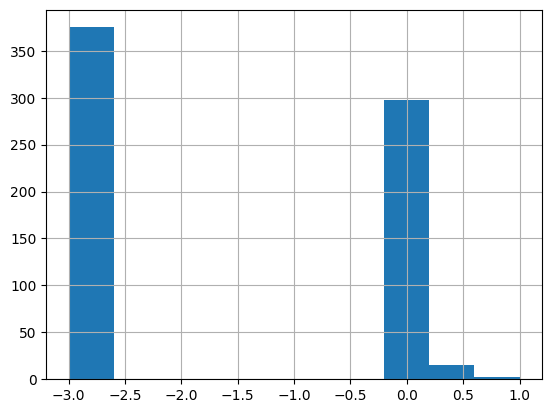

In [63]:
hexes_gdf['begin_2021_rel'].hist()

<AxesSubplot: >

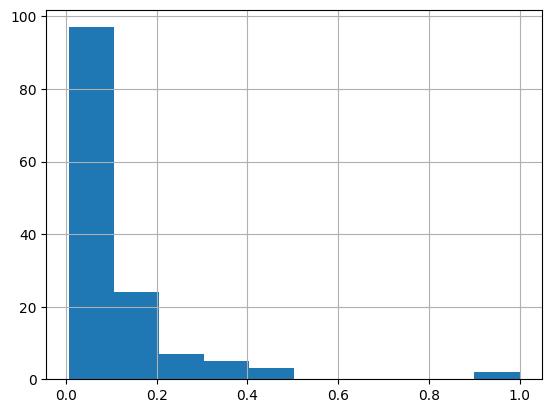

In [64]:
hexes_gdf.loc[hexes_gdf['begin_2021_rel'] > 0, 'begin_2021_rel'].hist()

In [65]:
hexes_gdf['end_2021_rel'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.count_2021 == 0) &
    (hexes_gdf.end_2021 == 0),
    'end_2021_rel'
] = -3

hexes_gdf.loc[
    (hexes_gdf.count_2021 > 0),
    'end_2021_rel'
] = hexes_gdf['end_2021'] / hexes_gdf['count_2021']

<AxesSubplot: >

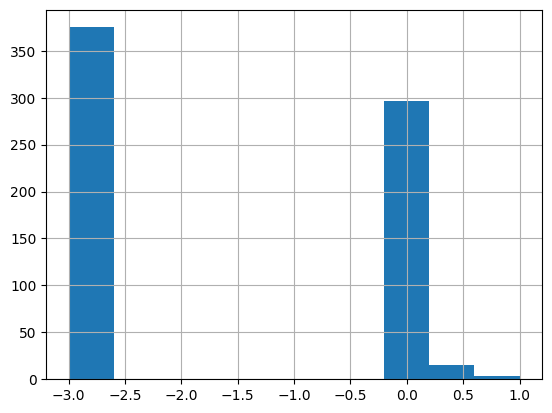

In [66]:
hexes_gdf['end_2021_rel'].hist()

<AxesSubplot: >

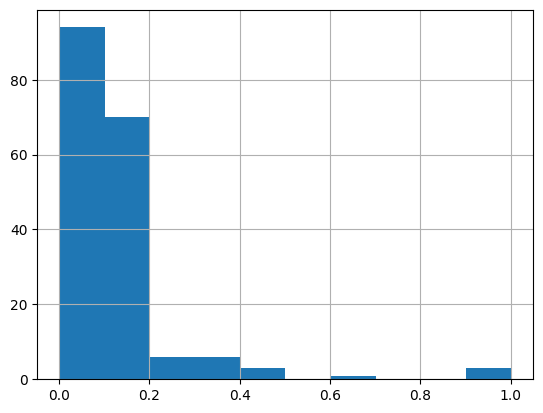

In [67]:
hexes_gdf.loc[hexes_gdf['end_2021_rel'] > 0, 'end_2021_rel'].hist()

In [68]:
hexes_gdf['count_2021_2020_rel'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.count_2020 == 0) &
    (hexes_gdf.count_2021 == 0),
    'count_2021_2020_rel'
] = -3

hexes_gdf.loc[
    (hexes_gdf.count_2020 == 0) &
    (hexes_gdf.count_2021 > 0),
    'count_2021_2020_rel'
] = -2

hexes_gdf.loc[
    (hexes_gdf.count_2020 > 0) &
    (hexes_gdf.count_2021 == 0),
    'count_2021_2020_rel'
] = -1

hexes_gdf.loc[
    (hexes_gdf.count_2020 > 0) &
    (hexes_gdf.count_2021 > 0),
    'count_2021_2020_rel'
] = hexes_gdf['count_2021'] / hexes_gdf['count_2020']

<AxesSubplot: >

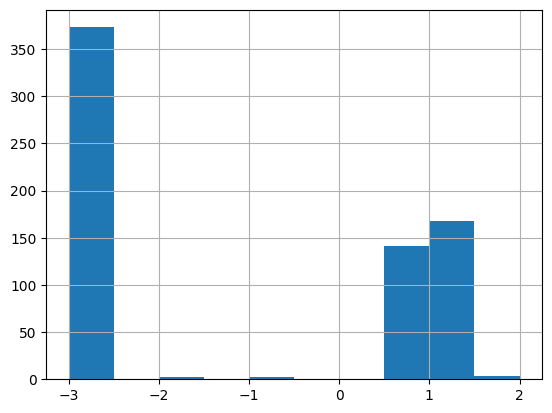

In [69]:
hexes_gdf['count_2021_2020_rel'].hist()

<AxesSubplot: >

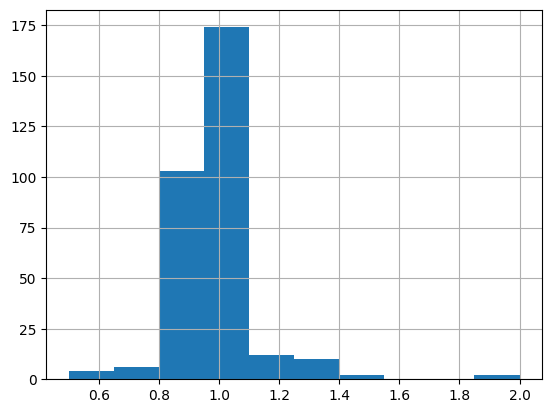

In [70]:
hexes_gdf.loc[hexes_gdf['count_2021_2020_rel'] > 0, 'count_2021_2020_rel'].hist()

In [71]:
hexes_gdf['net_profit_loss_to_revenue_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.revenue == 0),
    'net_profit_loss_to_revenue_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.revenue > 0),
    'net_profit_loss_to_revenue_2020'
] = hexes_gdf['net_profit_loss'] / hexes_gdf['revenue']

<AxesSubplot: >

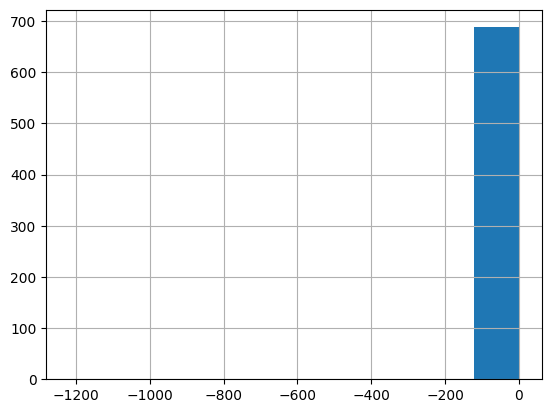

In [72]:
hexes_gdf['net_profit_loss_to_revenue_2020'].hist()

<AxesSubplot: >

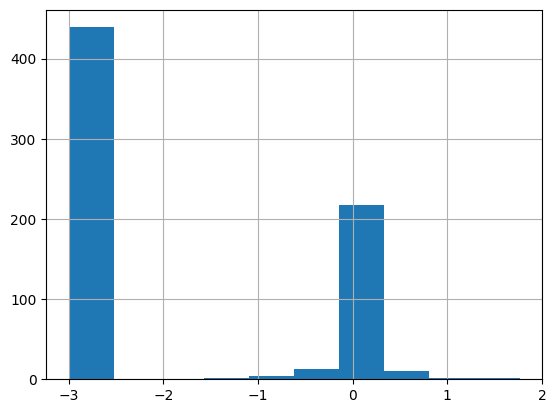

In [73]:
hexes_gdf.loc[
    (hexes_gdf['net_profit_loss_to_revenue_2020'] > -50) &
    (hexes_gdf['net_profit_loss_to_revenue_2020'] < 50),
    'net_profit_loss_to_revenue_2020'
].hist()

In [74]:
hexes_gdf['net_profit_loss_to_assets_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.assets_balance == 0),
    'net_profit_loss_to_assets_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.assets_balance > 0),
    'net_profit_loss_to_assets_2020'
] = hexes_gdf['net_profit_loss'] / hexes_gdf['assets_balance']

<AxesSubplot: >

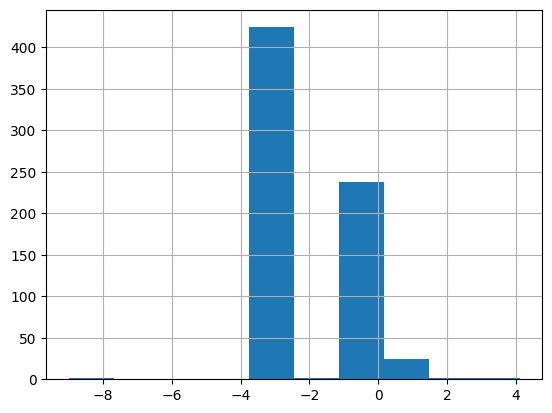

In [75]:
hexes_gdf['net_profit_loss_to_assets_2020'].hist()

<AxesSubplot: >

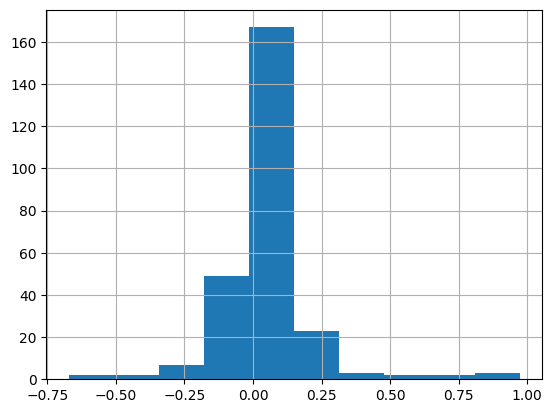

In [76]:
hexes_gdf.loc[
    (hexes_gdf['net_profit_loss_to_assets_2020'] > -1) &
    (hexes_gdf['net_profit_loss_to_assets_2020'] < 1),
    'net_profit_loss_to_assets_2020'
].hist()

In [77]:
hexes_gdf['short_borrowed_funds_to_revenue_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.revenue == 0),
    'short_borrowed_funds_to_revenue_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.revenue > 0),
    'short_borrowed_funds_to_revenue_2020'
] = hexes_gdf['short_borrowed_funds'] / hexes_gdf['revenue']

<AxesSubplot: >

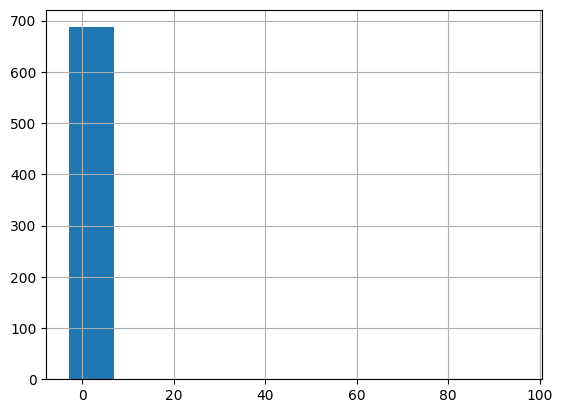

In [78]:
hexes_gdf['short_borrowed_funds_to_revenue_2020'].hist()

<AxesSubplot: >

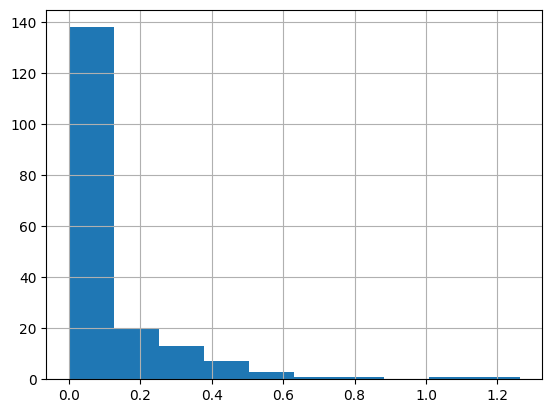

In [79]:
hexes_gdf.loc[
    (hexes_gdf['short_borrowed_funds_to_revenue_2020'] > 0) &
    (hexes_gdf['short_borrowed_funds_to_revenue_2020'] < 5),
    'short_borrowed_funds_to_revenue_2020'
].hist()

In [80]:
hexes_gdf['long_borrowed_funds_to_revenue_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.revenue == 0),
    'long_borrowed_funds_to_revenue_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.revenue > 0),
    'long_borrowed_funds_to_revenue_2020'
] = hexes_gdf['long_borrowed_funds'] / hexes_gdf['revenue']

<AxesSubplot: >

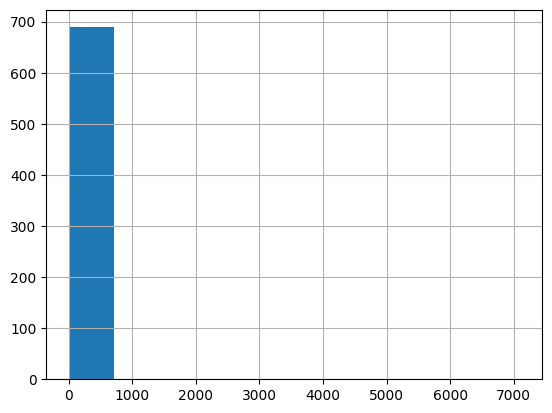

In [81]:
hexes_gdf['long_borrowed_funds_to_revenue_2020'].hist()

<AxesSubplot: >

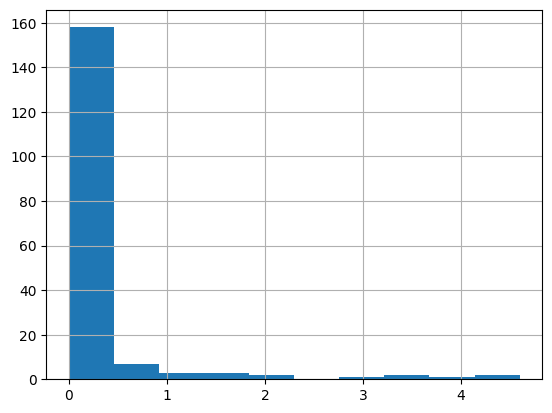

In [82]:
hexes_gdf.loc[
    (hexes_gdf['long_borrowed_funds_to_revenue_2020'] > 0) &
    (hexes_gdf['long_borrowed_funds_to_revenue_2020'] < 5),
    'long_borrowed_funds_to_revenue_2020'
].hist()

In [83]:
hexes_gdf['revenue_to_assets_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.assets_balance == 0),
    'revenue_to_assets_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.assets_balance > 0),
    'revenue_to_assets_2020'
] = hexes_gdf['revenue'] / hexes_gdf['assets_balance']

<AxesSubplot: >

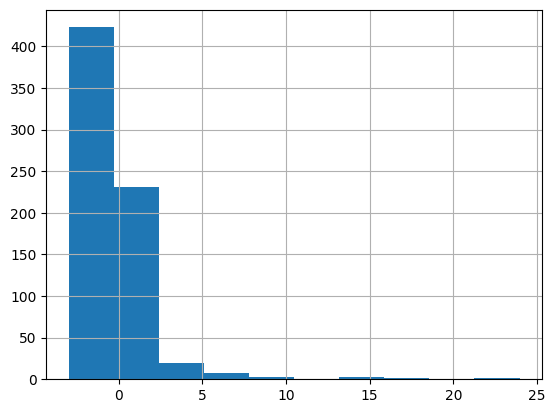

In [84]:
hexes_gdf['revenue_to_assets_2020'].hist()

<AxesSubplot: >

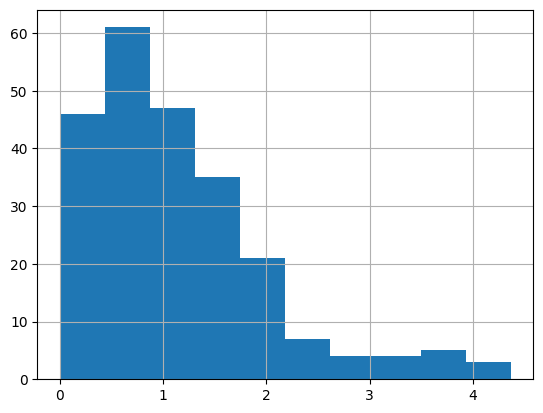

In [85]:
hexes_gdf.loc[
    (hexes_gdf['revenue_to_assets_2020'] > 0) &
    (hexes_gdf['revenue_to_assets_2020'] < 5),
    'revenue_to_assets_2020'
].hist()

In [86]:
hexes_gdf['assets_to_count_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.count_2020 == 0),
    'assets_to_count_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.count_2020 > 0),
    'assets_to_count_2020'
] = hexes_gdf['assets_balance'] / hexes_gdf['count_2020']

<AxesSubplot: >

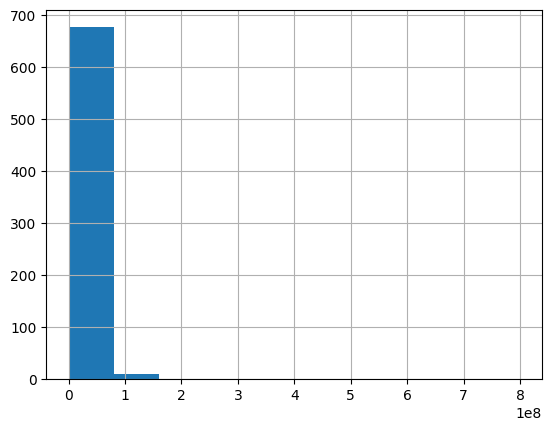

In [87]:
hexes_gdf['assets_to_count_2020'].hist()

<AxesSubplot: >

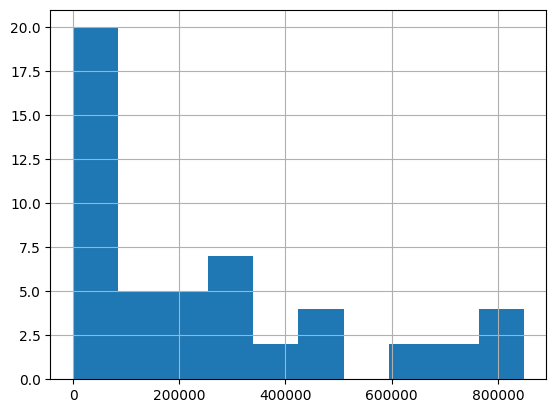

In [88]:
hexes_gdf.loc[
    (hexes_gdf['assets_to_count_2020'] > 0) &
    (hexes_gdf['assets_to_count_2020'] < 1e6),
    'assets_to_count_2020'
].hist()

In [89]:
hexes_gdf['net_profit_loss_to_count_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.count_2020 == 0),
    'net_profit_loss_to_count_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.count_2020 > 0),
    'net_profit_loss_to_count_2020'
] = hexes_gdf['net_profit_loss'] / hexes_gdf['count_2020']

<AxesSubplot: >

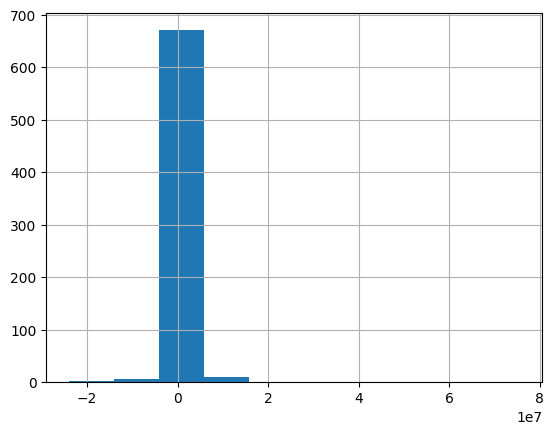

In [90]:
hexes_gdf['net_profit_loss_to_count_2020'].hist()

<AxesSubplot: >

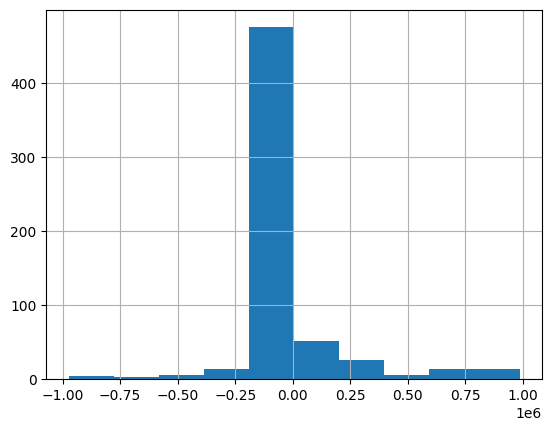

In [91]:
hexes_gdf.loc[
    (hexes_gdf['net_profit_loss_to_count_2020'] > -1e6) &
    (hexes_gdf['net_profit_loss_to_count_2020'] < 1e6),
    'net_profit_loss_to_count_2020'
].hist()

In [92]:
hexes_gdf['revenue_to_count_2020'] = np.nan

hexes_gdf.loc[
    (hexes_gdf.count_2020 == 0),
    'revenue_to_count_2020'
] = -3

hexes_gdf.loc[
    (hexes_gdf.count_2020 > 0),
    'revenue_to_count_2020'
] = hexes_gdf['revenue'] / hexes_gdf['count_2020']

<AxesSubplot: >

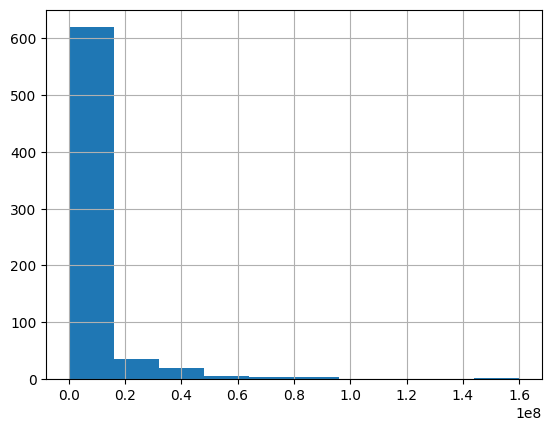

In [93]:
hexes_gdf['revenue_to_count_2020'].hist()

<AxesSubplot: >

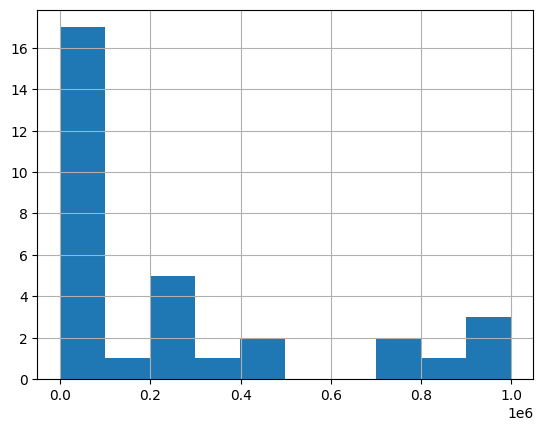

In [94]:
hexes_gdf.loc[
    (hexes_gdf['revenue_to_count_2020'] > 0) &
    (hexes_gdf['revenue_to_count_2020'] < 1e6),
    'revenue_to_count_2020'
].hist()

In [95]:
hexes_gdf.head(10)

,index,polygon,hex_id,h3_id_5,assets_balance,short_borrowed_funds,long_borrowed_funds,revenue,net_profit_loss,count_2020,count_2021,begin_2021,end_2021,begin_2021_rel,end_2021_rel,count_2021_2020_rel,net_profit_loss_to_revenue_2020,net_profit_loss_to_assets_2020,short_borrowed_funds_to_revenue_2020,long_borrowed_funds_to_revenue_2020,revenue_to_assets_2020,assets_to_count_2020,net_profit_loss_to_count_2020,revenue_to_count_2020
0,0,"POLYGON ((60.96752 59.31787, 61.04586 59.40211...",8510ea43fffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
1,1,"POLYGON ((61.88272 59.36600, 62.06624 59.37487...",8510ea6ffffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
2,2,"POLYGON ((61.91498 58.48625, 62.01555 58.41075...",8510c167fffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
3,3,"POLYGON ((61.32864 58.77730, 61.43092 58.70251...",8510c107fffffff,8510c107fffffff,2.626000e+06,0.0,1.340000e+05,2.170000e+05,-21000.0,9.0,9.0,0.0,1.0,0.000000,0.111111,1.00000,-0.096774,-0.007997,0.000000,0.617512,0.082635,2.917778e+05,-2333.333333,2.411111e+04
4,4,"POLYGON ((64.44039 58.58548, 64.62165 58.59067...",8510c8cffffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
5,5,"POLYGON ((62.94921 56.50961, 63.02664 56.59427...",8510dd5bfffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
6,6,"POLYGON ((61.72569 57.91284, 61.54893 57.90370...",8510c3abfffffff,8510c3abfffffff,6.467757e+09,158869523.0,1.269027e+09,6.651288e+09,481883300.0,742.0,707.0,33.0,62.0,0.046676,0.087694,0.95283,0.072450,0.074505,0.023886,0.190794,1.028376,8.716654e+06,649438.409704,8.964000e+06
7,7,"POLYGON ((59.70012 60.59249, 59.58984 60.66436...",8510eeaffffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
8,8,"POLYGON ((63.09317 58.45841, 62.99428 58.53479...",8510ce8ffffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00
9,9,"POLYGON ((62.25345 58.66312, 62.15263 58.73866...",8510c12bfffffff,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,-3.000000e+00


In [96]:
hexes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   index                                 690 non-null    int64   
 1   polygon                               690 non-null    geometry
 2   hex_id                                690 non-null    object  
 3   h3_id_5                               690 non-null    object  
 4   assets_balance                        690 non-null    float64 
 5   short_borrowed_funds                  690 non-null    float64 
 6   long_borrowed_funds                   690 non-null    float64 
 7   revenue                               690 non-null    float64 
 8   net_profit_loss                       690 non-null    float64 
 9   count_2020                            690 non-null    float64 
 10  count_2021                            690 non-null    float64 
 11

In [97]:
hexes_gdf.to_csv(
    f'/home/tochka/Documents/Other/Work/Geo/EGRUL/egrul_hexes/hexes_{reg}_ul_2.csv.gz',
    sep=';',
    compression='gzip',
    index=False
)

In [98]:
hexes_gdf.drop(columns=['h3_id_5']).to_parquet(
    f'/home/tochka/Documents/Other/Work/Geo/EGRUL/egrul_hexes/hexes_{reg}_ul_2.parquet.gzip',
    compression='gzip',
    index=False,
    engine='pyarrow' 
)